In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from datetime import datetime


In [ ]:
idf_df = pd.read_csv('transac_idf_cleaned.csv')
# db cleaned is without all real estate > 30000€/m2

In [ ]:
# define based on real estate basic datas X => as longitude and latitude for a price per square meter
X = idf_df[['longitude', 'latitude']].values
y = idf_df['prix_m2'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X

array([[ 2.40375064, 48.83624849],
       [ 2.348148  , 48.86560434],
       [ 2.32468916, 48.88330859],
       ...,
       [ 2.21748065, 48.99549225],
       [ 2.3147687 , 48.97772502],
       [ 2.21243488, 49.0221078 ]])

In [ ]:
y

array([10997.        , 11630.76923077, 11271.18644068, ...,
        2443.39622642,  6546.39175258,  2428.57142857])

In [ ]:
model_tree = DecisionTreeRegressor(max_depth=2)
model_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

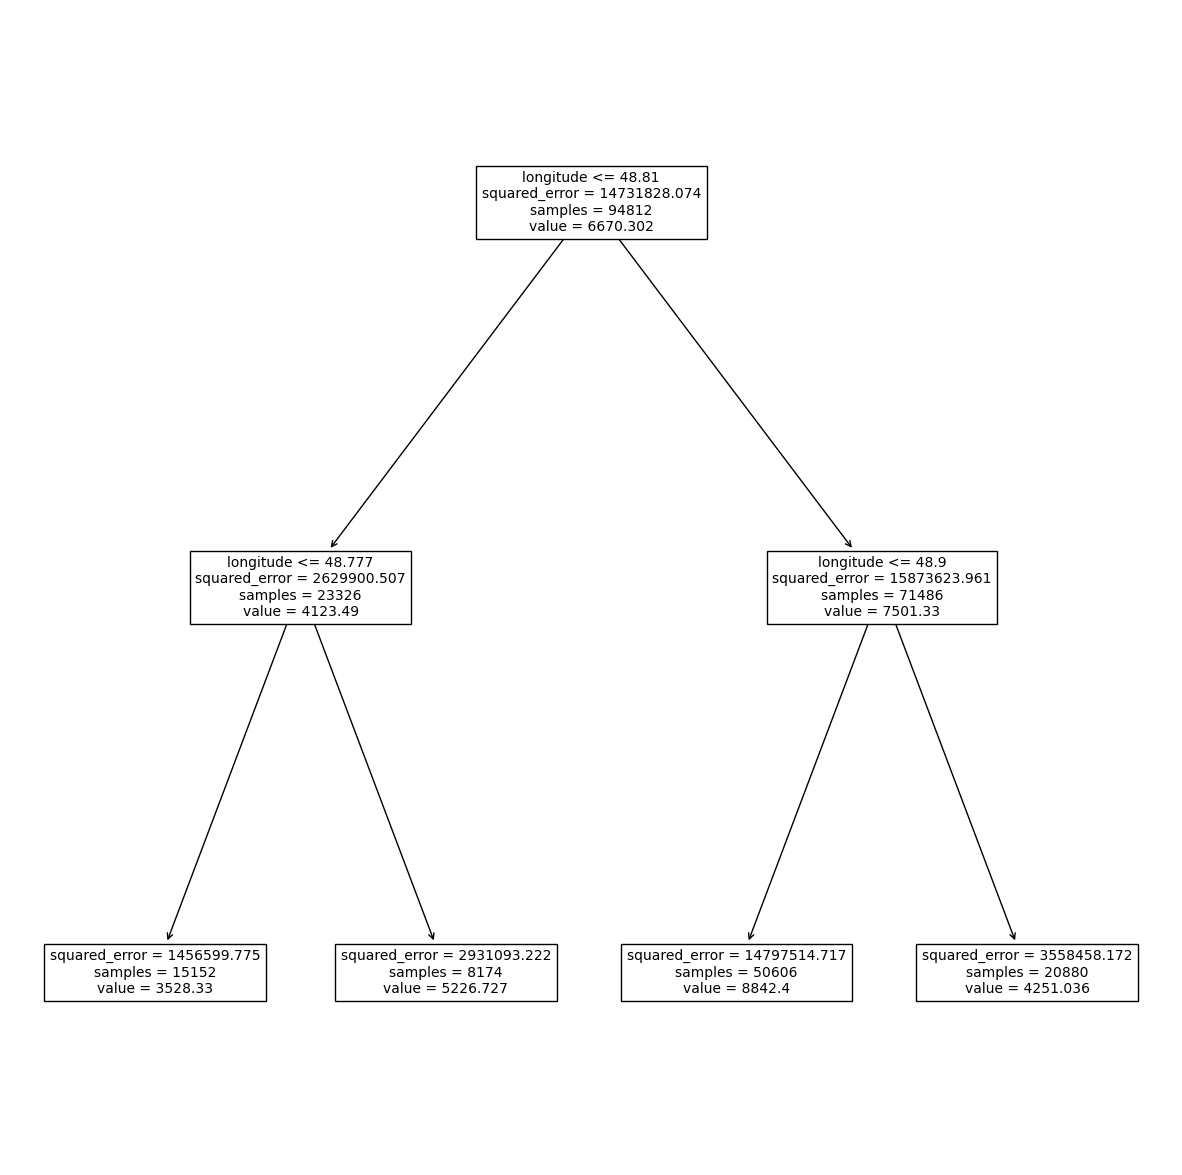

In [ ]:
plt.figure(figsize=(15, 15))
plot_tree(model_tree, feature_names=['latitude', 'longitude'], fontsize=10)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model_KNeigh = KNeighborsRegressor(n_neighbors=50)
model_KNeigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=50)

In [ ]:
from sklearn.linear_model import LinearRegression
model_Linear = LinearRegression()
model_Linear.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_RandForest = RandomForestRegressor(max_depth=100, min_samples_leaf=10, n_estimators=1000)
model_RandForest.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, min_samples_leaf=10, n_estimators=1000)

In [ ]:

def plot_with_contour(model, X, y):
    
    # Visualisation des contours de décision
    x_min, x_max = X[:, 0].min() - 0.01, X[:, 0].max() + 0.01
    y_min, y_max = X[:, 1].min() - 0.01, X[:, 1].max() + 0.01
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001),
                         np.arange(y_min, y_max, 0.001))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=1, cmap='coolwarm')
    
    # Normalize the colormap to ignore extreme values
    # sc = plt.scatter(X[:, 0], X[:, 1], c=y, vmin=0, vmax=20_2000,
    #                 marker='o', s=5, linewidth=1, cmap='coolwarm')
    
    sc = plt.scatter(X[:, 0], X[:, 1], c=y, vmin=np.percentile(y, 5), vmax=np.percentile(y, 95), 
                     marker='o', s=5, linewidth=1, cmap='coolwarm')
    
    
    plt.colorbar(sc, label='prix m2', orientation='vertical')
    
    
    plt.title(f"Contours de décision de {model}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()
    
    print(np.sqrt(mean_squared_error(y, model.predict(X))))
   


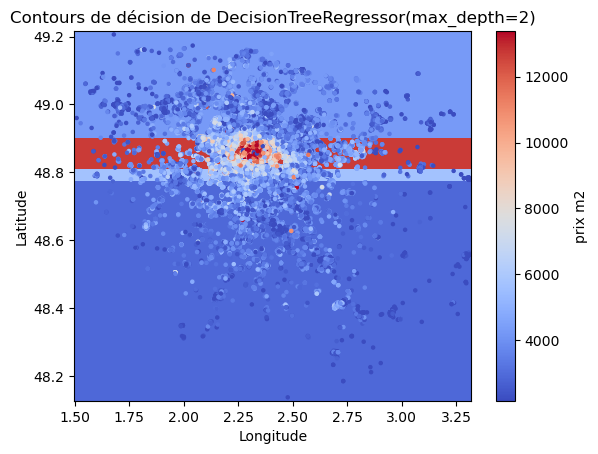

3033.921935436762
3058.4455951877303
3027.759724185413
3033.921935436762


In [ ]:
plot_with_contour(model_tree, X, y)
print(np.sqrt(mean_squared_error(y_test, model_tree.predict(X_test))))
print(np.sqrt(mean_squared_error(y_train, model_tree.predict(X_train))))
print(np.sqrt(mean_squared_error(y, model_tree.predict(X))))

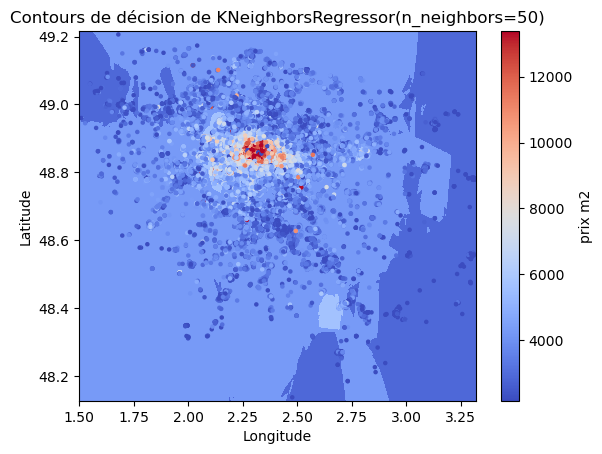

2037.8968242655426
2108.550635894849
2019.8464785665417
2037.8968242655426


In [ ]:
plot_with_contour(model_KNeigh, X,y)
print(np.sqrt(mean_squared_error(y_test, model_KNeigh.predict(X_test))))
print(np.sqrt(mean_squared_error(y_train, model_KNeigh.predict(X_train))))
print(np.sqrt(mean_squared_error(y, model_KNeigh.predict(X))))

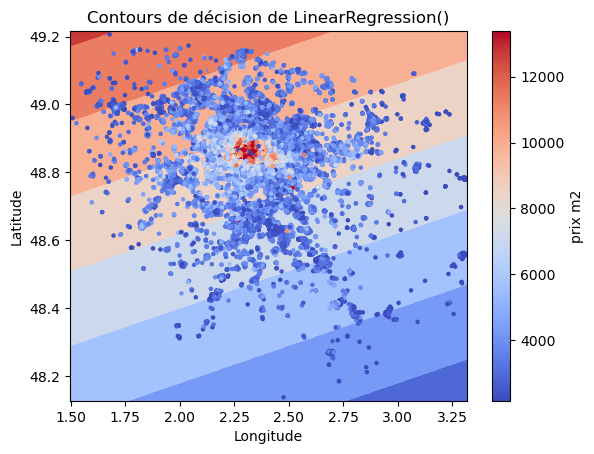

3800.5098312415007
3804.2466870942612
3799.5750035903347
3800.5098312415007


In [ ]:
plot_with_contour(model_Linear, X,y)
print(np.sqrt(mean_squared_error(y_test, model_Linear.predict(X_test))))
print(np.sqrt(mean_squared_error(y_train, model_Linear.predict(X_train))))
print(np.sqrt(mean_squared_error(y, model_Linear.predict(X))))

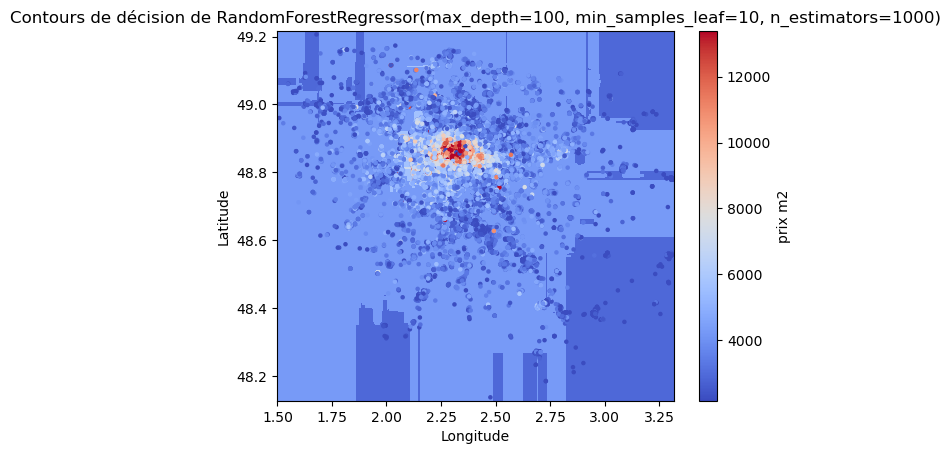

1845.9142598127428
2081.8380287059717
1782.05699971417
1845.9142598127428


In [ ]:
plot_with_contour(model_RandForest, X,y)
print(np.sqrt(mean_squared_error(y_test, model_RandForest.predict(X_test))))
print(np.sqrt(mean_squared_error(y_train, model_RandForest.predict(X_train))))
print(np.sqrt(mean_squared_error(y, model_RandForest.predict(X))))

In [ ]:
from sklearn.model_selection import GridSearchCV

params_grid = {
                'LR': {
                    'model': LinearRegression(),
                    'params': {
                        'fit_intercept': [True, False],
                        'positive': [True, False]
                    }
                },
                'DTR': {
                    'model': DecisionTreeRegressor(),
                    'params': {
                        'max_depth': list(range(4, 8)),
                        'min_samples_leaf': list(range(25,50))
                    }
                },
                'RFR': {
                    'model': RandomForestRegressor(),
                    'params': {
                        'max_depth': [25, 50]
                    }
                } 
            }

for model_name, model_config in params_grid.items():
    gs = GridSearchCV(estimator=model_config['model'], 
                      param_grid=model_config['params'])
    gs.fit(X_train, y_train)
    print(f'Modèle: {model_name} avec params optimaux: {gs.best_params_} donne erreur =')
    print(np.sqrt(mean_squared_error(y_test, gs.best_estimator_.predict(X_test))))

Modèle: LR avec params optimaux: {'fit_intercept': True, 'positive': False} donne erreur =
3804.2466870942612
Modèle: DTR avec params optimaux: {'max_depth': 7, 'min_samples_leaf': 29} donne erreur =
2322.112641932952
Modèle: RFR avec params optimaux: {'max_depth': 25} donne erreur =
2122.432397202325
